![imagenes](logo.png)

# Método de la Transformación Inversa

Este método consiste en, a través de una variable aleatoria uniforme $U(0,1)$, hacer una simulación de una variable aleatoria $X$ con función de distribución $F_X$.

**Método.** Si $F_X$ es la distribución de $X$ y $U$ es una variable aleatoria uniforme $U(0,1)$, entonces $Y=F_X^{-1}(U)$ tiene es una simulación de $X$.\\

**Demostración.** Notemos que $F_Y(y)=P(Y\le y)=P(F_X^{-1}(U)\le y)=P(U\le F_X(y))=F_X(y)$ 

**Ejemplo.** Si $F_X(x)=1-e^{-x}$ con $x\ge0$, entonces $F_X^{-1}(x)=\frac{1}{\log(1-x)}$ y por lo tanto $Y=\frac{1}{\log(1-U)}$ tiene distribución $F_X$.

In [1]:
import numpy as np
import pandas as pd
from math import *
from siuba import *
from plotnine import *

In [2]:
U = np.random.uniform(low=0, high=1, size=5000)
F_inv_puntual = lambda x: log(1/(1-x))
F_inv = np.vectorize(F_inv_puntual)

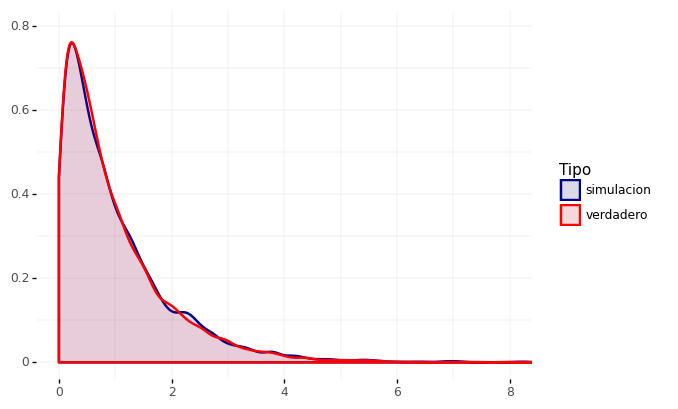

<ggplot: (-9223371929073316896)>

In [3]:
mi_data = (pd.DataFrame({"simulacion":F_inv(U),
           "verdadero":np.random.weibull(1,5000)}) >> 
           gather("Tipo",
                  "Valor",
                  _["simulacion","verdadero"])) 

(ggplot() +
    geom_density(data = mi_data,
                 mapping = aes("Valor",color="Tipo",fill="Tipo"),
                 alpha=0.1,size=1
                ) +
    scale_color_manual(values=["darkblue","red"]) +
    scale_fill_manual(values=["darkblue","red"]) +
    theme(
    panel_background = element_rect("white"), 
    panel_grid = element_line(color="darkgrey",size=0.1),
    axis_title = element_blank(), 
         ) +
  coord_cartesian(xlim=[0,8],ylim=[0,0.8])
)